# Analysis by Vikas Mishra

### About the E-Commerce Platform:
- This prominent online retail platform is headquartered in Bangalore, Karnataka, India. It showcases an extensive array of products, spanning electronics like laptops, tablets, smartphones, and mobile peripherals, along with stylish attire and lifestyle additions. The product range extends to contemporary furniture pieces like sofas, dining tables, and wardrobes, as well as essential appliances such as washing machines, TVs, ACs, mixer grinder juicers, and other time-saving kitchen appliances. The platform also offers home embellishments like cushion covers, mattresses, and bed sheets, in addition to a diverse selection of toys and musical instruments.

### Mobile Devices Sector:
- The sector encompassing mobile devices is undergoing rapid expansion and holds a significant position within the technology domain. Throughout the previous decade, the sector has witnessed exponential growth, with the number of mobile device users increasing fivefold. Worldwide, sales of smartphones to end users escalated from 300 million units in 2010 to 1.5 billion units by 2020.

### The Platform and Mobile Devices:
- Given the substantial demand for mobile devices and their status as sought-after items for both new and experienced vendors, this e-commerce platform provides an exceptional avenue for sellers to exhibit their products to a wide-ranging audience.

### Business Challenge:
- The aim is to tackle a hypothetical business challenge confronted by an Authorized Seller on the platform. The seller specializes in vending mobile devices through the platform and seeks direction to formulate informed choices. Specifically, the seller aims to pinpoint the most lucrative products, brands, specifications, and deals that can optimize revenue while conforming to budgetary constraints.

#### Key Issues to Address:
- Should the vendor concentrate on presenting products from a single brand, or does it hold merit to provide models from diverse brands?
- By executing Exploratory Data Analysis (EDA) and employing Data Visualization methods, the objective is to unveil insightful perceptions and associations among distinct product attributes.
- A comprehensive evaluation of each brand's performance and market presence will be conducted.
- The goal is to equip the seller with practical insights by addressing these inquiries, enabling them to make well-considered decisions concerning their strategy for vending mobile devices on the platform.

**Note:** Your responses should be grounded in the findings derived from the data, and these insights 
should be accurately reflected in your code implementation.

In [2]:
# importing libraries required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
# reading data
df = pd.read_csv("Data_Set_82B3653E3E.csv")

# Section 1: Analysing the data

In [4]:
# Top 5 records
df.head()

,brand,model,base_color,processor,screen_size,ROM,RAM,display_size,num_rear_camera,num_front_camera,battery_capacity,ratings,num_of_ratings,sales_price,discount_percent,sales
0,Apple,iPhone SE,Black,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
1,Apple,iPhone 12 Mini,Red,Ceramic,Small,64,4,5.4,2,1,2815,4.5,244,57149,0.04,1.39
2,Apple,iPhone SE,Red,Water,Very Small,64,2,4.7,1,1,1800,4.5,38645,32999,0.17,127.52
3,Apple,iPhone XR,Others,iOS,Medium,64,3,6.1,1,1,2942,4.6,5366,42999,0.10,23.07
4,Apple,iPhone 12,Red,Ceramic,Medium,128,4,6.1,2,1,2815,4.6,745,69149,0.02,5.15


In [5]:
# shape of the data
df.shape

(430, 16)

### Dataset contains 430 records and 16 attributes related to phones.

In [6]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             430 non-null    object 
 1   model             430 non-null    object 
 2   base_color        430 non-null    object 
 3   processor         430 non-null    object 
 4   screen_size       430 non-null    object 
 5   ROM               430 non-null    int64  
 6   RAM               430 non-null    int64  
 7   display_size      430 non-null    float64
 8   num_rear_camera   430 non-null    int64  
 9   num_front_camera  430 non-null    int64  
 10  battery_capacity  430 non-null    int64  
 11  ratings           430 non-null    float64
 12  num_of_ratings    430 non-null    int64  
 13  sales_price       430 non-null    int64  
 14  discount_percent  430 non-null    float64
 15  sales             430 non-null    float64
dtypes: float64(4), int64(7), object(5)
memory us

### Shape and info of the data is matching. So, we can conclude that there is no missing data.

In [7]:
# validating our conclusion of missing data
df.isnull().sum()

brand               0
model               0
base_color          0
processor           0
screen_size         0
ROM                 0
RAM                 0
display_size        0
num_rear_camera     0
num_front_camera    0
battery_capacity    0
ratings             0
num_of_ratings      0
sales_price         0
discount_percent    0
sales               0
dtype: int64

In [8]:
# checking for duplication
df.nunique()

brand                 5
model               119
base_color           12
processor             7
screen_size           5
ROM                   7
RAM                   7
display_size         17
num_rear_camera       4
num_front_camera      3
battery_capacity     30
ratings              10
num_of_ratings      175
sales_price         141
discount_percent     33
sales               216
dtype: int64

### Our dataset contains phones from 5 brands only.

In [9]:
# list of the brands
df['brand'].unique().tolist()

['Apple', 'Poco', 'Realme', 'Samsung', 'Xiaomi']

In [10]:
# statistics of the data (only numerical columns)
df.describe().T # result is transposed for optimized view

,count,mean,std,min,25%,50%,75%,max
ROM,430.0,105.748837,63.164064,8.00,64.00,128.000,128.0000,512.00
RAM,430.0,5.320930,2.182635,1.00,4.00,4.000,6.0000,12.00
display_size,430.0,6.369767,0.369549,4.70,6.30,6.500,6.5000,7.60
num_rear_camera,430.0,2.904651,0.952350,1.00,2.00,3.000,4.0000,4.00
num_front_camera,430.0,1.044186,0.227280,1.00,1.00,1.000,1.0000,3.00
battery_capacity,430.0,4529.397674,986.907252,1800.00,4000.00,4500.000,5000.0000,7000.00
ratings,430.0,4.339302,0.151494,3.00,4.30,4.300,4.4000,4.60
num_of_ratings,430.0,23567.944186,56096.277784,4.00,745.00,5197.500,21089.2500,642373.00
sales_price,430.0,25433.234884,22471.926588,5742.00,11999.00,16989.500,28999.0000,157999.00
discount_percent,430.0,0.108000,0.073432,0.01,0.06,0.090,0.1600,0.44


### From the stats, we can infer the following things:
- Sales price ranges from Rs. 5742 to Rs. 157999. It means we have basic phones to high-end phones included in the data.
- ROM ranges from 8GB to 512GB.
- Average display size in demand is 6.3 inches.
- The average mobile battery capacity is around 4500 mAh.
- Ratings of the phones range from as low as 3 to as high as 4.6.

# Section 2: Exploratory Data Analysis

## Univariate Analysis

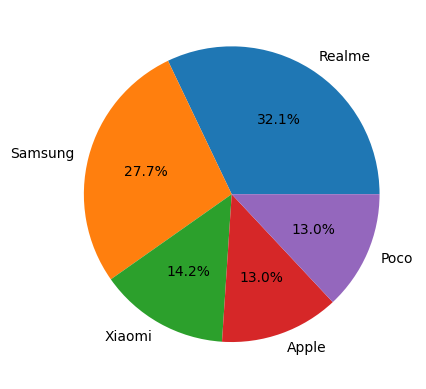

In [11]:
# Most sold brands by count
brand_sell_count = df.brand.value_counts()
plt.pie(brand_sell_count.values, labels=brand_sell_count.index, autopct="%1.1f%%")
plt.show()

### Realme and samsung together supply more than half of the market demand

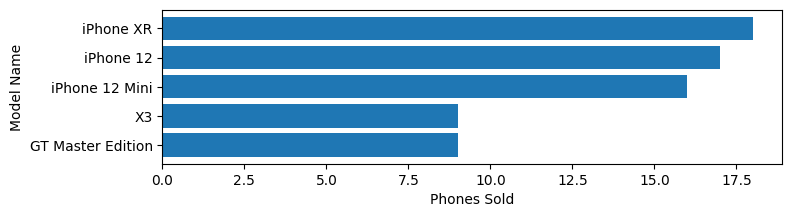

In [26]:
# Top 5 models in demand
model_sell_count = df.model.value_counts()
top_models = model_sell_count.head().sort_values()
plt.figure(figsize=(8,2))
plt.barh(top_models.index, top_models.values)
plt.xlabel("Phones Sold")
plt.ylabel("Model Name")
plt.show()

### The top-selling models are the iPhone XR, iPhone 12, and iPhone Mini.

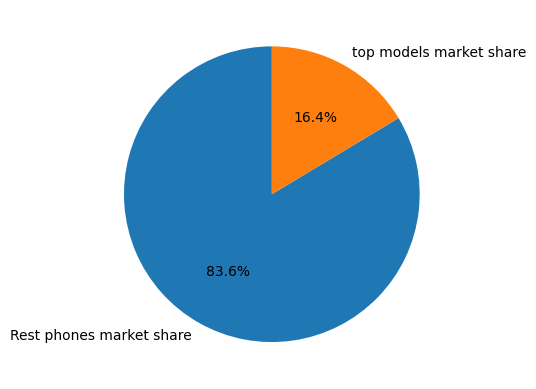

In [13]:
# Top Selling phone market share versus rest market share
rest_count = model_sell_count.iloc[6:].sum()
top_count = top_models.sum()
y = np.array([rest_count, top_count])
labels = ["Rest phones market share", "top models market share"]
plt.pie(y, labels=labels, autopct="%1.1f%%", startangle=90)
plt.show()

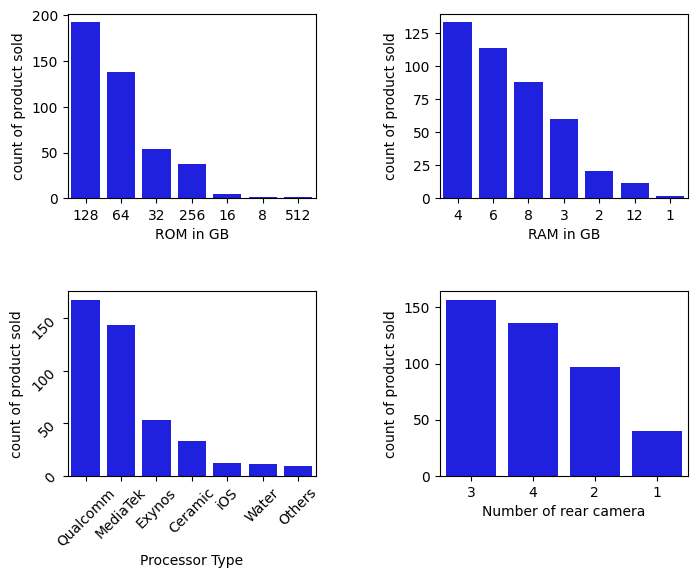

In [35]:
# Bar plots for attributes
fig, ax = plt.subplots(2,2, figsize=(8,6))
sns.countplot(ax=ax[0,0], x = "ROM", data=df, order= df.ROM.value_counts().index, color= "blue");
ax[0,0].set(xlabel = "ROM in GB", ylabel = "count of product sold")
sns.countplot(ax=ax[0,1], x= "RAM", data=df, order= df.RAM.value_counts().index, color= "blue");
ax[0,1].set(xlabel = "RAM in GB", ylabel = "count of product sold")
sns.countplot(ax=ax[1,0], x= "processor", data=df, order= df.processor.value_counts().index, color= "blue");
ax[1,0].set(xlabel = "Processor Type", ylabel = "count of product sold")
sns.countplot(ax=ax[1,1], x= "num_rear_camera", data=df, order= df.num_rear_camera.value_counts().index, color= "blue");
ax[1,1].set(xlabel = "Number of rear camera", ylabel = "count of product sold")
plt.subplots_adjust(hspace=0.5)
plt.subplots_adjust(wspace=0.5)
ax[1,0].tick_params(labelrotation=45)

### From above charts, we can infer the below things:
- 128 GB is the highest in demand storage space, followed by 64 GB space.
- 4 GB is the highest in demand RAM, followed by 6 GB of RAM.
- Qualcomm is the highest sold processor, followed by mediatek processor.
- Phones having 3 cameras at the back are in high demand.

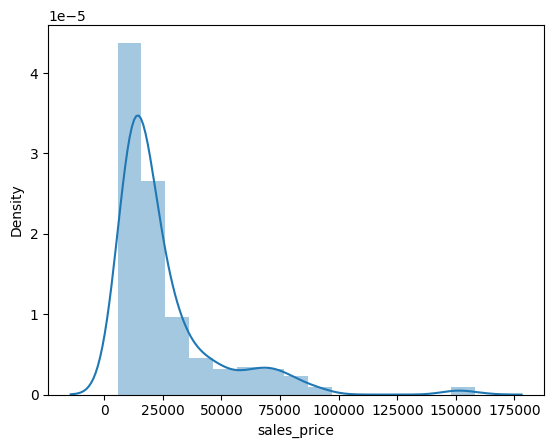

In [36]:
# Most affordable price range
sns.distplot(a=df.sales_price, bins=15)
plt.show()

### The most affordable price range is approximately between Rs. 5000 and Rs. 25000.

## Bivariate Analysis

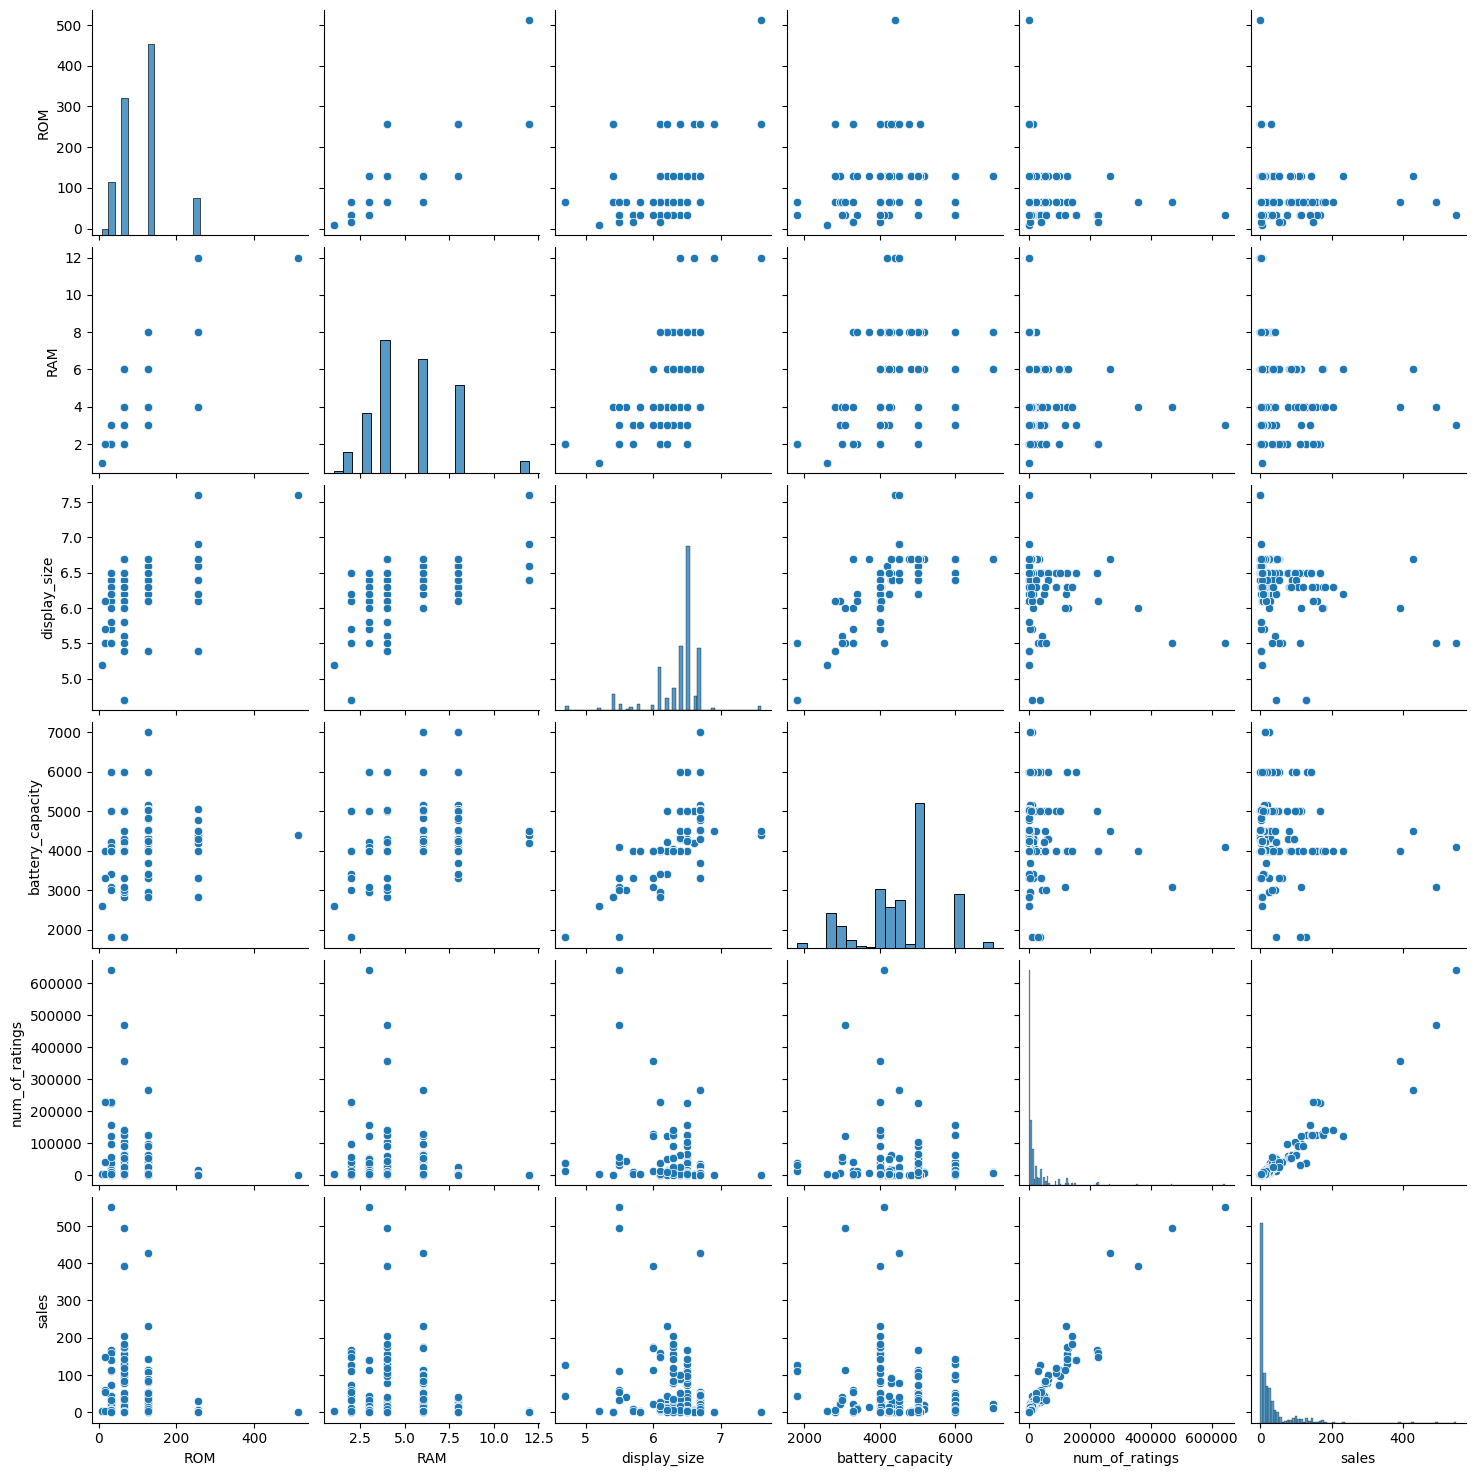

In [17]:
# relation between major features of phone and it sales
major_features = df[["ROM", "RAM", "display_size", "battery_capacity", "num_of_ratings", "sales"]]
sns.pairplot(major_features)
plt.show()

### We gained following insights from pair plot:
- ROM has positive correlation with RAM of the phone.
- RAM has positive correlation with display size of the phone.
- Display size has positive correlation with the capacity of the battery.
- No. of ratings is positively related with the sales of the phone.

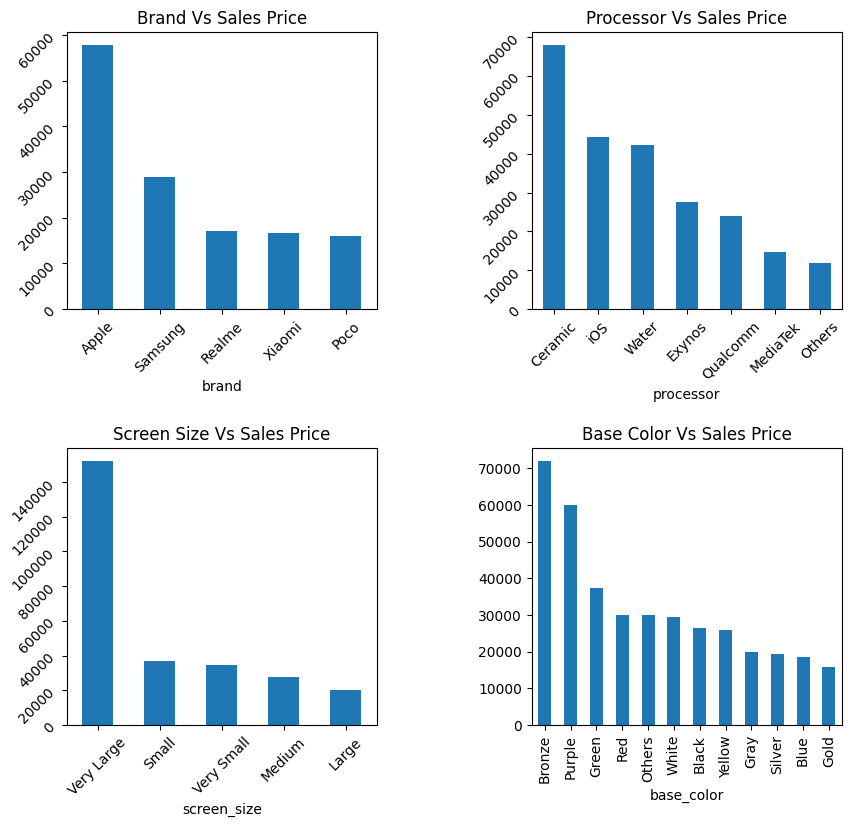

In [18]:
# Sales price of the phones versus categorical attributes of the phone.
fig, axes = plt.subplots(2,2, figsize = (10, 9))

brand_vs_salesprice = df.groupby("brand")['sales_price'].mean().sort_values(ascending=False)
brand_vs_salesprice.plot.bar(ax=axes[0,0])
axes[0,0].tick_params(labelrotation=45)
axes[0,0].set_title("Brand Vs Sales Price")

processor_vs_salesprice = df.groupby("processor")["sales_price"].mean().sort_values(ascending=False)
processor_vs_salesprice.plot.bar(ax=axes[0,1])
axes[0,1].tick_params(labelrotation=45)
axes[0,1].set_title("Processor Vs Sales Price")

screensize_vs_salesprice = df.groupby("screen_size")['sales_price'].mean().sort_values(ascending=False)
screensize_vs_salesprice.plot.bar(ax=axes[1,0])
axes[1,0].set_title("Screen Size Vs Sales Price")
axes[1,0].tick_params(labelrotation=45)

basecolor_vs_salesprice = df.groupby("base_color")['sales_price'].mean().sort_values(ascending=False)
basecolor_vs_salesprice.plot.bar(ax=axes[1,1])
axes[1,1].set_title("Base Color Vs Sales Price")

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

### Observations:
- On Average, Apple is the most expensive brand in the market, Poco is the least expensive.
- Average sales price of ceramic processor is higher than their competitors.
- Very Large screen has the largest market share by sales price, large screen phones have least average sales price.
- Bronze color phones has highest average sales price in the market.

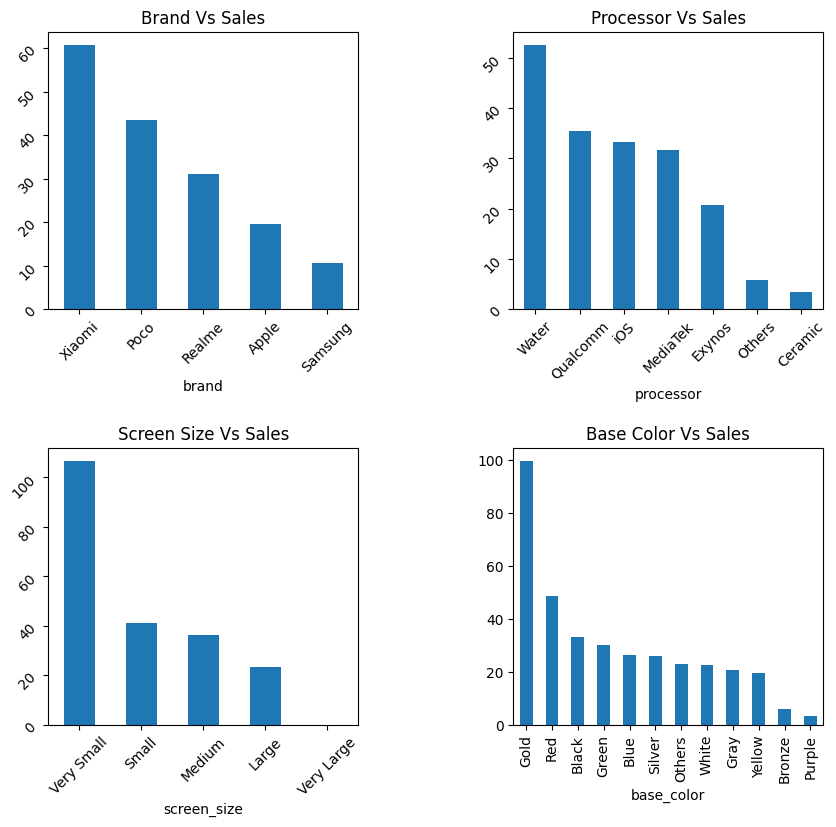

In [19]:
# Sales of the phones versus categorical attributes of the phone.
fig, axes = plt.subplots(2,2, figsize = (10, 9))

brand_vs_sales = df.groupby("brand")['sales'].mean().sort_values(ascending=False)
brand_vs_sales.plot.bar(ax=axes[0,0])
axes[0,0].tick_params(labelrotation=45)
axes[0,0].set_title("Brand Vs Sales")

processor_vs_sales = df.groupby("processor")["sales"].mean().sort_values(ascending=False)
processor_vs_sales.plot.bar(ax=axes[0,1])
axes[0,1].tick_params(labelrotation=45)
axes[0,1].set_title("Processor Vs Sales")

screensize_vs_sales = df.groupby("screen_size")['sales'].mean().sort_values(ascending=False)
screensize_vs_sales.plot.bar(ax=axes[1,0])
axes[1,0].set_title("Screen Size Vs Sales")
axes[1,0].tick_params(labelrotation=45)

basecolor_vs_sales = df.groupby("base_color")['sales'].mean().sort_values(ascending=False)
basecolor_vs_sales.plot.bar(ax=axes[1,1])
axes[1,1].set_title("Base Color Vs Sales")

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

### Observations:
- Xiaomi brand has highest average unit sales in the market, samsung has the lowest.
- Water processor has the highest demand in the market, ceramic has the lowest.
- Very small screen size is frequently sold in the market, very large screen sale is the lowest.
- Gold is in high demand, purple color phones are in less demand.

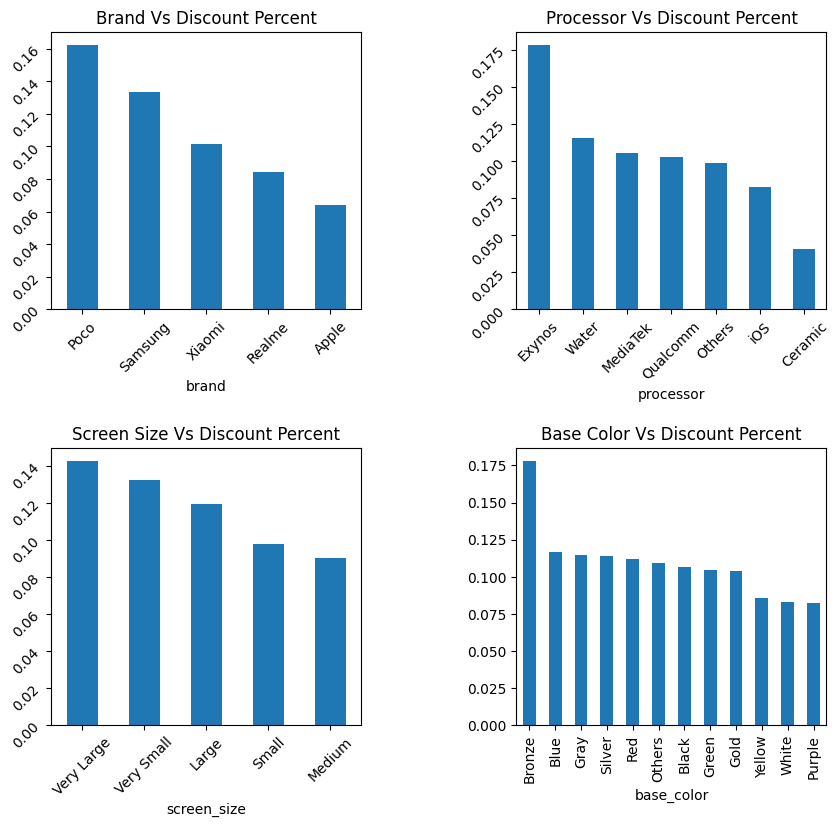

In [20]:
# discount on the phones versus categorical attributes of the phone.
fig, axes = plt.subplots(2,2, figsize = (10, 9))

brand_vs_discount = df.groupby("brand")['discount_percent'].mean().sort_values(ascending=False)
brand_vs_discount.plot.bar(ax=axes[0,0])
axes[0,0].tick_params(labelrotation=45)
axes[0,0].set_title("Brand Vs Discount Percent")

processor_vs_discount = df.groupby("processor")["discount_percent"].mean().sort_values(ascending=False)
processor_vs_discount.plot.bar(ax=axes[0,1])
axes[0,1].tick_params(labelrotation=45)
axes[0,1].set_title("Processor Vs Discount Percent")

screensize_vs_discount = df.groupby("screen_size")['discount_percent'].mean().sort_values(ascending=False)
screensize_vs_discount.plot.bar(ax=axes[1,0])
axes[1,0].set_title("Screen Size Vs Discount Percent")
axes[1,0].tick_params(labelrotation=45)

basecolor_vs_discount = df.groupby("base_color")['discount_percent'].mean().sort_values(ascending=False)
basecolor_vs_discount.plot.bar(ax=axes[1,1])
axes[1,1].set_title("Base Color Vs Discount Percent")

plt.subplots_adjust(wspace=0.5)
plt.subplots_adjust(hspace=0.5)

### Observations:
- Average discount on the poco phones is higher than their competitors.
- Average discount on the ceramic is the lowest, considering it has the highest average sales price in the market.
- More discount is given on very large screen phones and bronze color phones.

## Multivariate Analysis

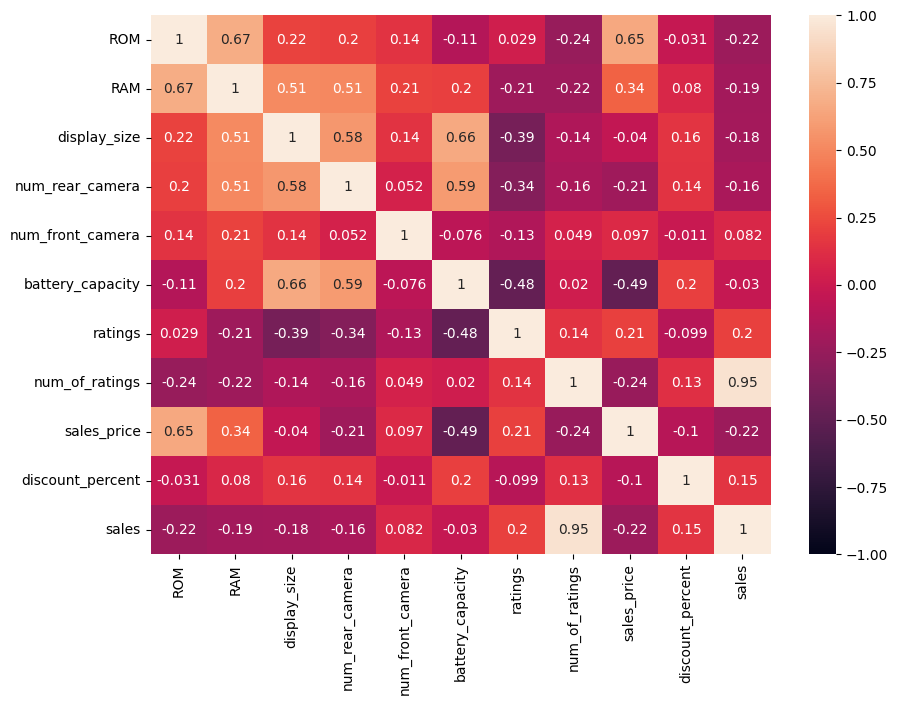

In [21]:
# heat map for correlation among attributes.
plt.figure(figsize=(10,7))
sns.heatmap(df.drop(["brand", "model", "processor", "screen_size", "base_color"], axis=1).corr(), annot=True, vmin=-1, vmax=1)
plt.show()

### Observations:
- ROM has positive correlation with RAM as well as sales price.
- Display size has positive correlation with number of rear camera as well as battery capacity.
- Battery capacity has negative correlation with ratings as well as sales price.
- Number of ratings are strongly correlated with the sales price of the device.

# Section 3: Overall insights from the above analysis:

### The vendor should provide models from different brands for the following reasons:
- Most of the customers have bought phones from realme, followed by Samsung. To engage a larger number of customers, the vendor should stock phones from both realme and Samsung.
- The highest average sales are from Xiaomi phones, followed by Poco.
- Apple and Samsung phones contribute the most to revenue, but the sales of Apple phones are the lowest.
- Apple has three models out of the top five models sold. The top 5 models comprise approximately 14% of the phones sold in the market.

### Before stocking the inventory, the vendor should also focus on the following findings:
- 64 GB and 128 GB storage capacities are commonly sought after.
- 4 GB, 6 GB, and 8 GB RAM configurations have captured more than 70% of the market.
- Qualcomm and MediaTek together hold approximately 70% of the market share in terms of products sold.
- Most consumers are looking for low to medium-range phones (i.e., Rs. 5000 to Rs. 25000). Consumers rarely purchase phones costing more than 1 lakh.
- Phones with Ceramic processors are the least sold in the market but contribute the highest to the sales price.
- As consumers mainly focus on budget phones, phones with very small display sizes have the highest sales.
- Sales of gold-colored phones are the highest, but the average sales price is the lowest.
- Bronze base color phones contribute the highest to the sales price and have the highest average discount.
- The average discount on Poco phones is the highest, but it contributes the lowest to the sales price.
- As the battery capacity of phones increases, their ratings decrease, affecting the sales price of the phones.
- Larger display sizes require more RAM and battery capacity as there is a positive correlation among them.
- The higher the ROM, the higher the sale price of the phone."

--------------------------------------------------------------------------------------------------------------

# Business Insights and Recommendations for the Vendor:

- Diversify Brand Selection:
   > Stock phones from both Realme and Samsung to engage a larger customer base. <br>
   > Prioritize Xiaomi and Poco models due to their high average sales.

- Maximize Apple and Samsung Revenue:
   > Ensure sufficient stock of Apple and Samsung phones, focusing on top-performing models.

- Storage and RAM Configurations:
   > Emphasize 64 GB and 128 GB storage options. <br>
   > Prioritize phones with 4 GB, 6 GB, and 8 GB RAM configurations.

- Processor Choices:
   > Stock phones with Qualcomm and MediaTek processors, which hold a combined 70% market share.

- Price Range Focus:
  >  Concentrate on phones in the Rs. 5000 to Rs. 25000 price range to align with customer preferences.

- Ceramic Processors:
  >  Include a limited quantity of phones with Ceramic processors due to their higher contribution to sales price.

- Display Size and Color Preferences:
   > Offer a variety of display sizes, with a focus on smaller sizes. <br>
   > Balance inventory between gold and bronze base color phones to cater to different customer segments.

- Discount Strategy:
   > Utilize the high average discount on Poco phones to attract price-sensitive customers.
 
- Battery Capacity and Ratings:
   > Select phones with a balanced battery capacity to avoid negative effects on ratings and sales price.

- Display Size and RAM/Battery Correlation:
   > Consider the correlation between display size, RAM, and battery capacity when choosing phone models.

- ROM and Sale Price:
   > Offer phones with varying ROM options to cater to customers with different storage needs.

### By implementing these recommendations, the vendor can optimize their product selection, pricing, and inventory management to meet consumer preferences and maximize revenue.